In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=1000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV


In [44]:
num_features = ['age', 'income'] 
cat_features = ['gender', 'city']

In [45]:
X_df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])


In [46]:
X_df = X_df.rename(columns={'feature_0': 'age', 'feature_1': 'income'})


In [47]:
X_df['gender'] = np.random.choice(['male', 'female'], size=x.shape[0])
X_df['city'] = np.random.choice(['New York', 'Los Angeles', 'Chicago'], size=x.shape[0])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size=0.33, random_state=42)


In [49]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    [('num', num_transformer, num_features),
     ('cat', cat_transformer, cat_features)]
)


In [50]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [51]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}

In [52]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__max_depth': [None, 10, ...], 'regressor__min_samples_split': [2, 5], 'regressor__n_estimators': [50, 100, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [53]:

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best R² Score: 0.7605676804360699


In [54]:
models = { 
    'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(), 
    'Logistic Regression': LogisticRegression(max_iter=200) 
}

In [55]:
results = {}

In [56]:
for name, model in models.items(): 
    print(f"\nTraining Model: {name}") 
     
    # Create pipeline 
    pipe = Pipeline(steps=[ 
        ('preprocessor', preprocessor), 
        ('classifier', model) 
    ])


Training Model: Decision Tree

Training Model: Random Forest

Training Model: Logistic Regression


In [57]:
pipe = Pipeline(steps=[ 
        ('preprocessor', preprocessor), 
        ('classifier', model) 
    ])

In [58]:
 pipe.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
train_pred = pipe.predict(x_train) 
test_pred = pipe.predict(x_test)

In [60]:
train_acc = accuracy_score(y_train, train_pred) 
test_acc = accuracy_score(y_test, test_pred) 
     
results[name] = { 
        'model': pipe, 
        'train_accuracy': train_acc, 
        'test_accuracy': test_acc, 
        'train_predictions': train_pred, 
        'test_predictions': test_pred, 
        'confusion_matrix': confusion_matrix(y_test, test_pred), 
        'classification_report': classification_report(y_test, test_pred) 
    }

In [61]:
print("\nMODEL PERFORMANCE SUMMARY:") 
for name, info in results.items(): 
    print(f"\n=== {name} ===") 
    print(f"Training Accuracy: {info['train_accuracy']:.4f}") 
    print(f"Testing Accuracy: {info['test_accuracy']:.4f}") 
    print("Confusion Matrix (Test):") 
    print(info['confusion_matrix']) 
    print("Classification Report (Test):") 
    print(info['classification_report']) 


MODEL PERFORMANCE SUMMARY:

=== Logistic Regression ===
Training Accuracy: 0.9284
Testing Accuracy: 0.9515
Confusion Matrix (Test):
[[148   9]
 [  7 166]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       157
           1       0.95      0.96      0.95       173

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [62]:
best_model = max(results.items(), key=lambda x: x[1]['test_accuracy']) 
print(f"\nBest Model: {best_model[0]} with Test Accuracy: {best_model[1]['test_accuracy']:.4f}")


Best Model: Logistic Regression with Test Accuracy: 0.9515


In [63]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [64]:
randomcv_models = [ 
    ( 
        'Random Forest', 
        Pipeline([ 
            ('preprocessor', preprocessor),  # your column transformer 
            ('classifier', RandomForestClassifier(random_state=42)) 
        ]), 
        { 
            'classifier__n_estimators': [50, 100, 200], 
            'classifier__max_depth': [None, 10, 20], 
            'classifier__min_samples_split': [2, 5], 
            'classifier__min_samples_leaf': [1, 2], 
            'classifier__bootstrap': [True, False] 
        } 
    ), 
    ( 
        'Logistic Regression', 
        Pipeline([ 
            ('preprocessor', preprocessor), 
            ('classifier', LogisticRegression(max_iter=200, random_state=42)) 
        ]), 
        { 
            'classifier__penalty': ['l2'], 
            'classifier__C': [0.01, 0.1, 1.0, 10], 
            'classifier__solver': ['liblinear', 'lbfgs'] 
        } 
    ) 
]

In [65]:
model_param = {} 
 
for name, model, params in randomcv_models: 
    print(f"\nTuning: {name}") 
    random = RandomizedSearchCV( 
        estimator=model, 
        param_distributions=params, 
        n_iter=10, 
        cv=3, 
        n_jobs=-1, 
        verbose=1, 
        random_state=42 
    ) 
    random.fit(x_train, y_train) 
    model_param[name] = random.best_params_ 
    print(f"Best Params for {name}:") 
    print(random.best_params_)


Tuning: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params for Random Forest:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': True}

Tuning: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params for Logistic Regression:
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 0.1}


C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [66]:
from sklearn.metrics import roc_auc_score, roc_curve 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [67]:
# Function to plot Lift Curve (LOC) 
def plot_lift_curve(y_true, y_proba, model_name): 
    df = pd.DataFrame({'y_true': y_true, 'y_score': y_proba}) 
    df = df.sort_values('y_score', ascending=False).reset_index(drop=True) 
    df['cum_response'] = df['y_true'].cumsum() 
    df['lift'] = df['cum_response'] / (np.arange(1, len(df) + 1)) 
    baseline = df['y_true'].sum() / len(df) 
    lift = df['lift'] / baseline 
    plt.plot(np.arange(len(df)) / len(df), lift, label=model_name) 
    plt.xlabel('Proportion of Sample') 
    plt.ylabel('Lift') 
    plt.title('Lift Curve (LOC)') 
    plt.grid(True)

In [68]:
def evaluate_models_roc_loc(models, model_param, x_train, y_train, x_test, y_test):
    plt.figure(figsize=(14, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(x_train, y_train)
        y_proba = best_model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        print(f'AUC Score for {name}: {auc:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)

    # Lift Curve
    plt.subplot(1, 2, 2)
    for name, model, _ in models:
        best_model = model.set_params(**model_param[name])
        best_model.fit(x_train, y_train)
        y_proba = best_model.predict_proba(x_test)[:, 1]
        plot_lift_curve(y_test, y_proba, model_name=name)

    plt.legend()
    plt.tight_layout()
    plt.show()


AUC Score for Random Forest: 0.981
AUC Score for Logistic Regression: 0.988


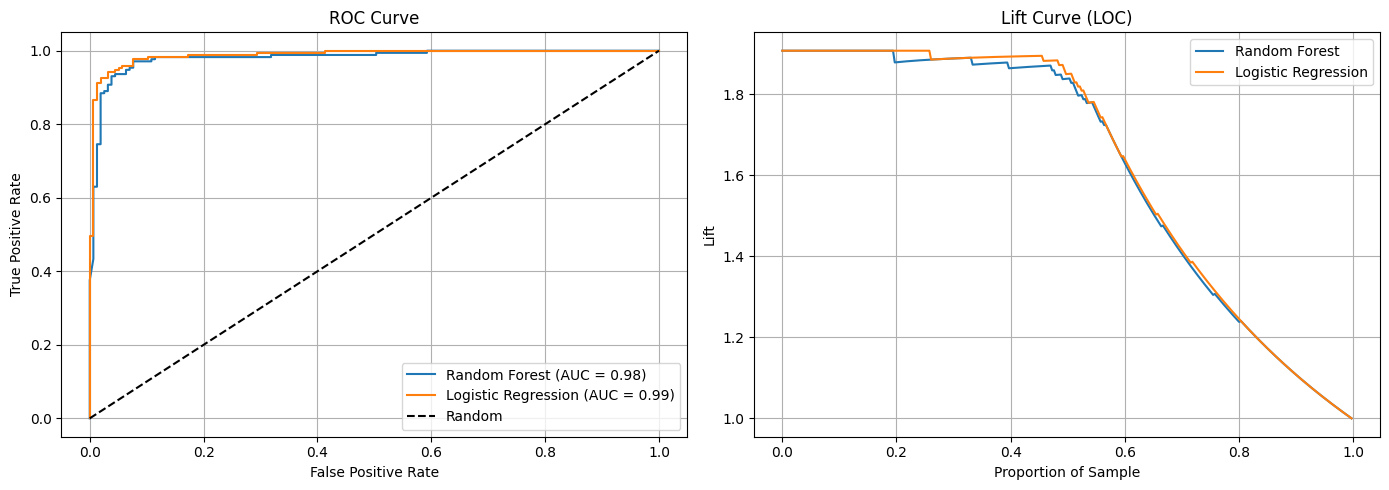

In [69]:
evaluate_models_roc_loc(randomcv_models, model_param, x_train, y_train, x_test, y_test) 